# Tandem Piercer Experiment - Measurement report

Load Python libraries:

In [1]:
import os
from tpe.Stats import Stats
from tpe.functions import md, load_styles, get_report_header

Load inline graphics utility (and optionally output current working directory name):

In [2]:
%pylab inline
#print("\nCurrent directory: %s" % os.getcwd())

Populating the interactive namespace from numpy and matplotlib


Initialize statistic class and output available experiment files to use in this report:

In [3]:
st = Stats()
st.print_experiment_stat_files("../experiments/default_2022_2_24*");

../experiments\default_2022_2_24_16_46\statistics.csv


Define experiment directory to work with:

In [4]:
directory = "../experiments\default_2022_2_24_16_46"

Output header, general settings, instrument details and trigger info for the selected measurement:

In [5]:
get_report_header(directory)

<h2>Cd-109 10μci whole spectrum</h2><h3>General settings</h3>                <table>                <tr><th>Pulse source</th><td>Cd-109 10μci</td></tr>                <tr><th>Pulse detection</th><td>SCA `(pos[:-1] & ~pos[1:]).nonzero()`</td></tr>                <tr><th>Sample size</th><td>8e-06s</td></tr>                <tr><th>Resolution</th><td>8e-09s</td></tr>                <tr><th>PicoScope trigger</th><td>simple, alternate: True </td></tr>                <tr><th>Detector geometry</th><td>next</td></tr>                <tr><th>Front detector</th><td>na</td></tr>                <tr><th>PMT High Voltage</th><td>-1000</td></tr>                </table>
<h3>SCA instrument details</h3>
|             | Detector A   | Detector B   |
|:------------|:-------------|:-------------|
| Sca Model   | Ortec 490B   | Ortec 490B   |
| Coarse Gain | 4.0          | 4.0          |
| Fine Gain   | 3.75         | 10.0         |
| Mode        | diff         | diff         |
| Window      | 10.0         | 10.0         |
| Lower Level | 0.7          | 0.4          |
<h3>ADC limits for PicoScope channels</h3>
|                 | A (0)   | B (1)   | C (2)   | D (3)   |
|:----------------|:--------|:--------|:--------|:--------|
| Voltage range   | 10V     | 10V     | 20V     | 20V     |
| ADC low limits  | 4096    | 4096    | 842     | 576     |
| ADC high limits | 32768   | 32768   | 19661   | 19661   |
<h3>PicoScope channel map</h3>
|                        |   Detector A |   Detector B |
|:-----------------------|-------------:|-------------:|
| Sca Square Pulse Index |            0 |            1 |
| Raw Pulse Index        |            2 |            3 |
<h3>PicoScope trigger details</h3>            <table>            <tr><th>Channel (start)</th><td>0</td></tr>            <tr><th>Delay (samples)</th><td>0</td></tr>            <tr><th>Direction</th><td>RISING</td></tr>            <tr><th>Threshold (ADC)</th><td>16384</td></tr>            </table>


### Experiment measurement statistics

Read statistics from the measurement and output summary:

In [6]:
st.read_stats_dataframe(directory);
st.print_basic_data();



Start time:	2022-02-24 14:46:29
End time:	2022-02-24 14:56:29
Time elapsed:	0:09:59
Rows count:	38620
Total count A:	21111
Total count B:	21681
Elapsed rate A:	35.185/s
Elapsed rate B:	36.135/s
Sample rate A:	136295.7/s
Sample rate B:	141048.7/s


Total coincidences:		3422
Single coincidences:		3074
Coincidence elapsed rate:	10.2/s
Coincidence sample rate:	40540.54/s


## Detector clicks in time

Plot detected clicks from the detectors. Time refers to the elapsed time i.e. the efficiency of the program being able to gather clicks from the detector, not the estimated rate of the radiation:

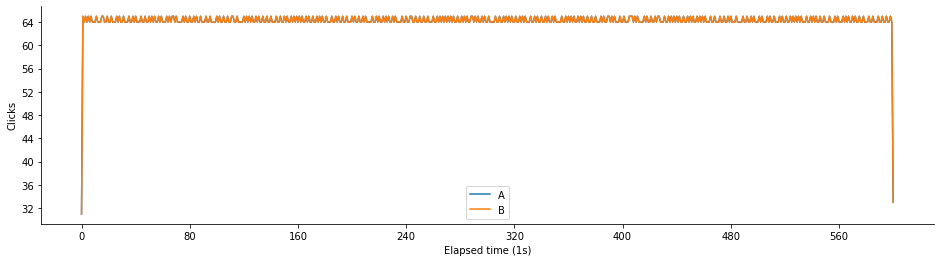

In [7]:
st.plot_channel_counts(sec=1)

## Detector accumulated clicks and sample rates

Plot accumulated clicks and sample rates per detector. In the second plot the rate is a sample based estimation of radiation per second.

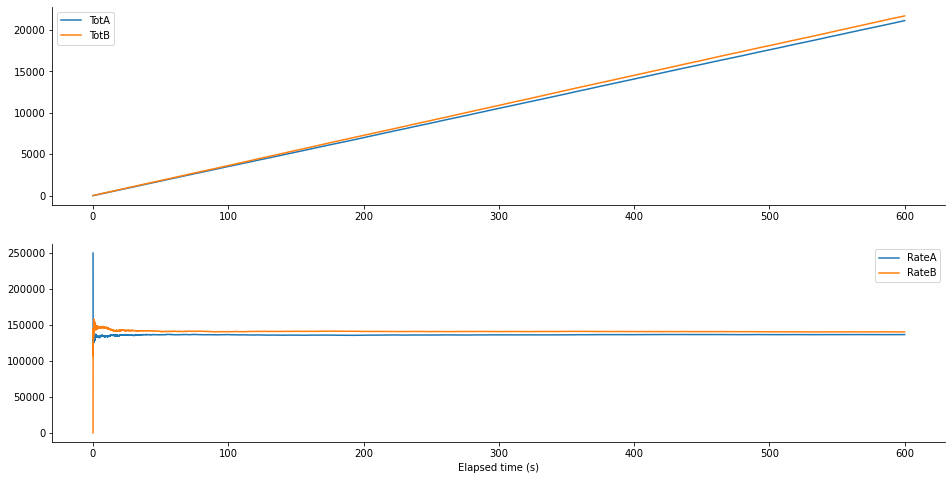

In [8]:
st.plot_channel_totals_and_rates()

### Pulse height spectrum

Plot pulse height spectrum by bar graph, line graph, fitted curve and scatter version.

Peaks are automatically detected by using `scipy.find_peaks` algorithm and then drawn to the plots.

#### Channel A

Maximum bins: 43


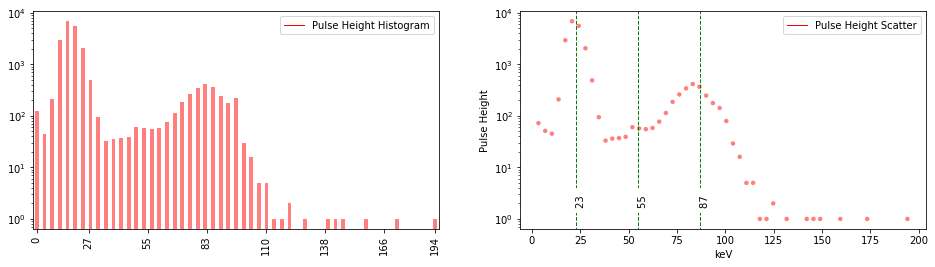

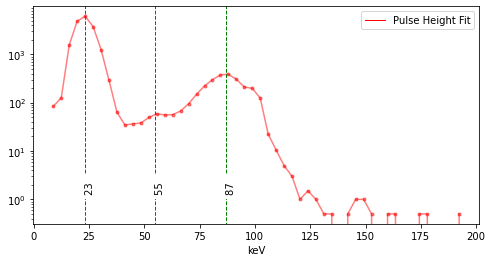

In [38]:
peaks_a = st.plot_channel_pulse_height_spectrum("A", bins=54, rolling=2, width=.1, distance=1, threshold=0.0001)[:3];

#### Channel B

Maximum bins: 42


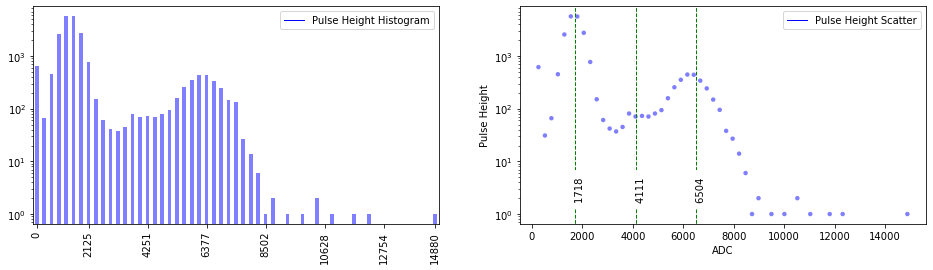

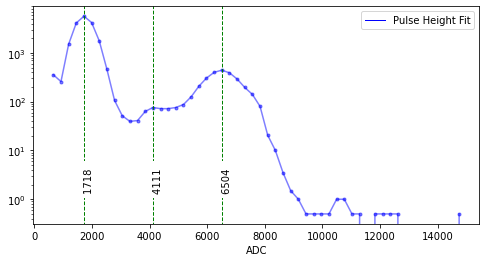

In [10]:
peaks_b = st.plot_channel_pulse_height_spectrum("B", bins=56, rolling=2, width=.1, distance=1, threshold=0.0001)[:3];

How do I know that this spectrum is correct and the peaks are in right places? I can compare them to the reference image, which shows the characteristic peaks in the Cd-109 spectrum:

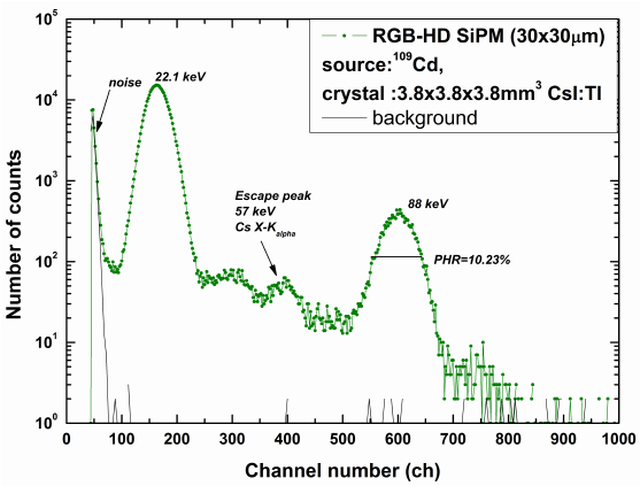

In [11]:
from tpe.functions import show_image
image_width = 640
show_image('the-energy-spectrum-of-88-kev-gamma-rays.png', width=image_width)

<center>*Cd-109 spectrum in Csl(Tl) scintillator with SiPM detector: https://www.researchgate.net/publication/264674849_Performance_of_FBK_high-density_SiPMs_in_scintillation_spectrometry*</center>

### ADC to keV conversion

Output peak lines ADC to keV conversion table. Wvelength and frequency conversions are also added to get and idea of the values in different useful physical units.

In [12]:
import pandas as pd
from tpe.functions import conversion_table
pd.options.display.float_format = '{:.1f}'.format

xray_peak_cd109 = 22.1
xray_peak_index = 0

escape_peak = 57
escape_peak_index = 1

gamma_photo_peak_cd109 = 88
gamma_photo_peak_index = 2

labels = ["X-ray peak", "Escape peak", "Gamma photo peak"]
kevs = [xray_peak_cd109, escape_peak, gamma_photo_peak_cd109]    
indices = [xray_peak_index, escape_peak_index, gamma_photo_peak_index]

conversion_table(pd, peaks_a, peaks_b, labels, kevs, indices)

,Energy (keV),Wavelength (nm),Frequency (s),Channel A (ADC),Channel B (ADC)
,,,,,
X-ray peak,22.1,56.1,"5,343,756",1721,1718
Escape peak,57.0,21.8,"13,782,538",4118,4111
Gamma photo peak,88.0,14.1,"21,278,305",6515,6504


## Calibration

After determining the spectrum for both channels and finding characteristic peaks I can set the main calibration peak value (ADC) to correspond kilo-electronvolts. I have chosen gamma photopeak to be the main pedal point:

In [13]:
st.adc_calibrate_a(peaks_a[gamma_photo_peak_index], gamma_photo_peak_cd109)
st.adc_calibrate_b(peaks_b[gamma_photo_peak_index], gamma_photo_peak_cd109)

Set the rest of the known characteristic energy lines:

In [14]:
st.add_calibration_line_a(xray_peak_cd109)
st.add_calibration_line_b(xray_peak_cd109)

st.add_calibration_line_a(escape_peak)
st.add_calibration_line_b(escape_peak)

## Coincidence time histogram and scatter plot

Time difference is retrieved when one of the detectors triggers and if there is a pulse in the other detector then a time distance between clicks is calculated by substracting the index of the pulses and multiplying that by the resolution of the oscilloscope. Typically, when there is a peak in the middle of the time difference histogram, it suggests that clicks were coincident and caused either by the same ray passing both detectors or two simultaneous rays coming in a stream.

In the color scatter plot channels are distinguished by the red and blue colors. The size of the point relates to the time difference. Bigger the point, smaller is the time difference. Darker the dots are, more there are hits on the same exact place.

With the above calibration and ADC to keV conversion I can plot coincidence scatter data relative to keV energy lines.

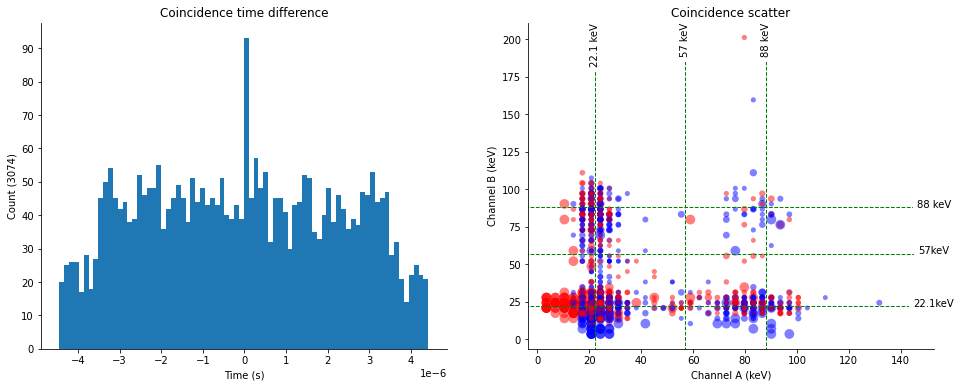

In [15]:
st.plot_time_histogram_and_scatter()

Plot only coincidences where time difference is from zero to 100. Number refers to samples, so the real unit of time is retrieved when you multiply that value by oscilloscope resolution.

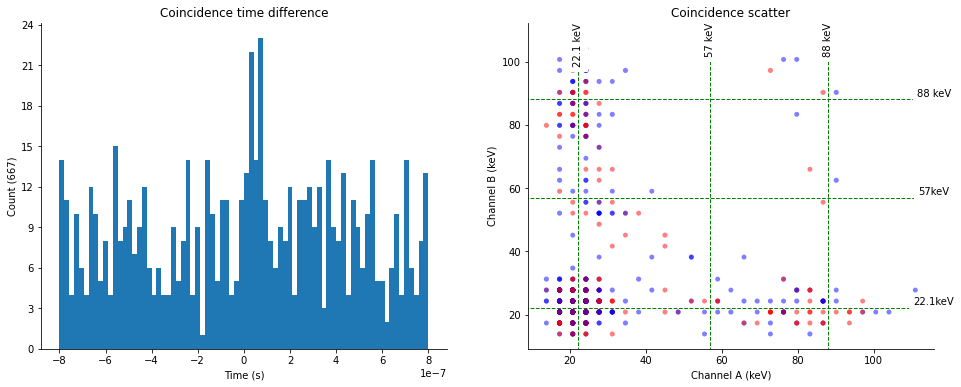

In [16]:
st.plot_time_histogram_and_scatter(time_difference=100)

## Detectors coincidence counts and rates

Plot coincident clicks, accumulated value and rates. Sample rate shows how many clicks there are in each individual sample. Elapsed rate is the value compared to running time.

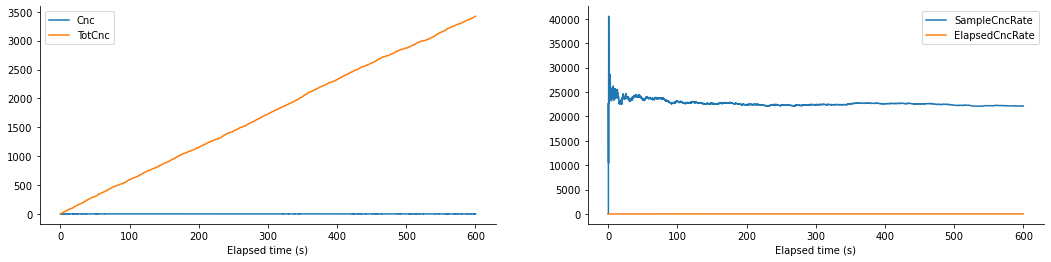

In [17]:
st.plot_coincidences_and_sample_rate()

## Coincidence spectra

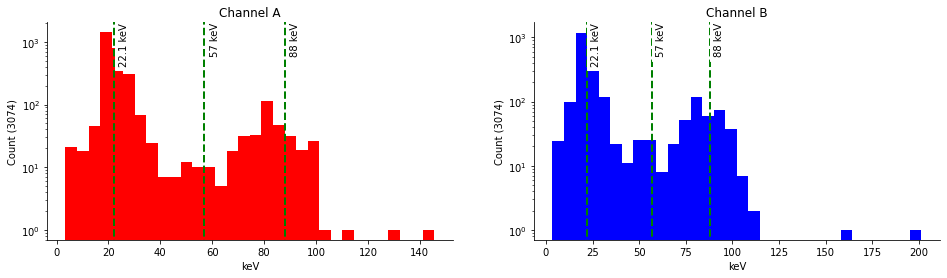

In [18]:
st.plot_spectra(coincidences=True, log=True, bins=(32, 32));

#### Data

In [19]:
st.print_stats_link()

<br/><center><h3>Download csv file: <a target='_blank' href='https://github.com/markomanninen/tandempiercerexperiment/raw/main/experiments\default_2022_2_24_16_46\statistics.csv'>statistics.csv</a></h3></center>

Output head and tail of the statistics data:

In [20]:
def fstats(d):
    d["Elapsed"] = d["Elapsed"].astype(int)
    d["RateA"] = d["RateA"].astype(int)
    d["RateB"] = d["RateB"].astype(int)
    return d

fstats(st.stats[:])

,RateCount,Time,Elapsed,A,B,TotA,TotB,RateA,RateB,Cnc,TotCnc,ElapsedCncRate,SampleCncRate,TimeDifference,APulseHeight,BPulseHeight,SampleSize,Chn
0,1,2022-02-24 14:46:29.466777325,0,1,0,1,0,250000,0,0,0,0.0,0.0,nan,2053,0,0.0,0
1,2,2022-02-24 14:46:29.479743004,0,0,1,1,1,125000,125000,0,0,0.0,0.0,nan,0,1795,0.0,1
2,3,2022-02-24 14:46:29.495699883,0,1,0,2,1,166666,83333,0,0,0.0,0.0,nan,1283,0,0.0,0
3,4,2022-02-24 14:46:29.510660648,0,0,1,2,2,125000,125000,0,0,0.0,0.0,nan,0,1282,0.0,1
4,5,2022-02-24 14:46:29.526622771,0,1,0,3,2,150000,100000,0,0,0.0,0.0,nan,1540,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38615,38616,2022-02-24 14:56:29.371188641,599,0,1,21108,21679,136653,140349,0,3421,5.7,22147.6,nan,0,2052,0.2,1
38616,38617,2022-02-24 14:56:29.387792110,599,1,0,21109,21679,136656,140346,0,3421,5.7,22147.0,nan,1540,0,0.2,0
38617,38618,2022-02-24 14:56:29.401778698,599,0,1,21109,21680,136652,140349,0,3421,5.7,22146.4,nan,0,1795,0.2,1
38618,38619,2022-02-24 14:56:29.418436050,599,1,0,21110,21680,136655,140345,0,3421,5.7,22145.8,nan,6673,0,0.2,0


<hr />

In [21]:
load_styles("../report.css")